In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.Read the data to python environment**

In [2]:
iris_data=pd.read_excel('/content/iris (3).xls')
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
##checking info
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**2.Preprocessing**

In [5]:
##checking missing values
iris_data.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

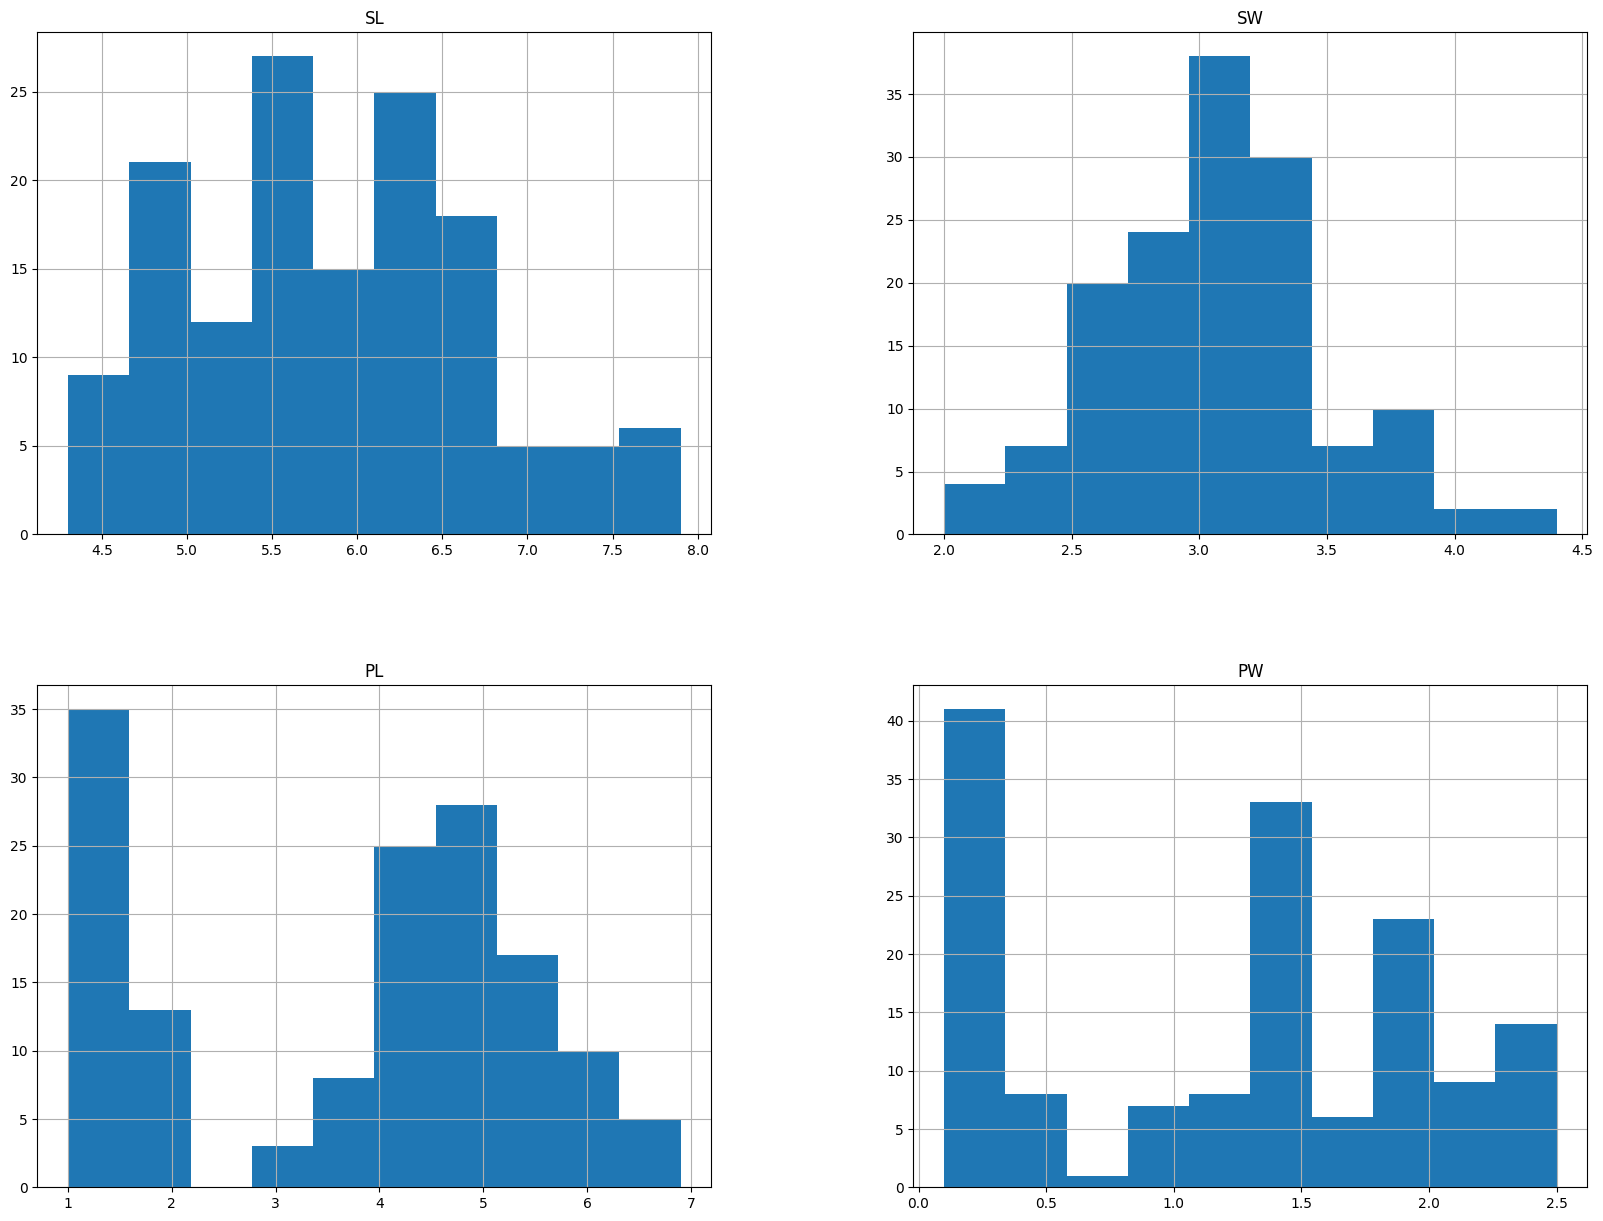

In [6]:
##ploting histogram
freqgraph=iris_data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))
plt.show()

In [7]:
##filling missing values
missing_columns=['SL','SW','PL']
for i in missing_columns:
  iris_data[i]=iris_data[i].fillna(iris_data[i].median())

In [8]:
##checking missing values
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**Outliers**

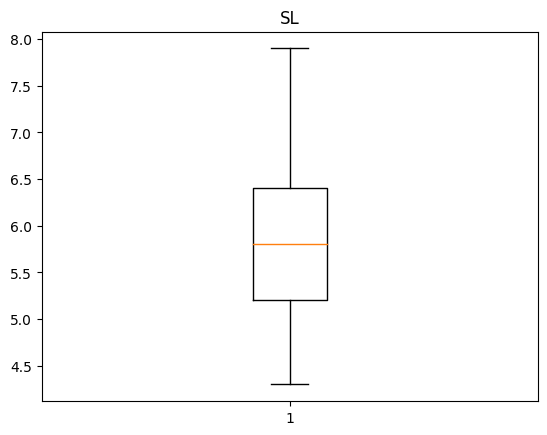

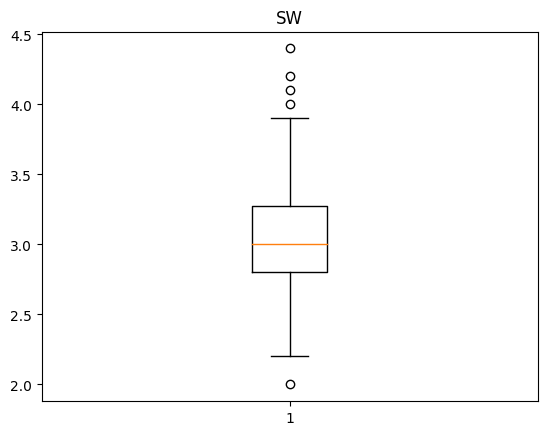

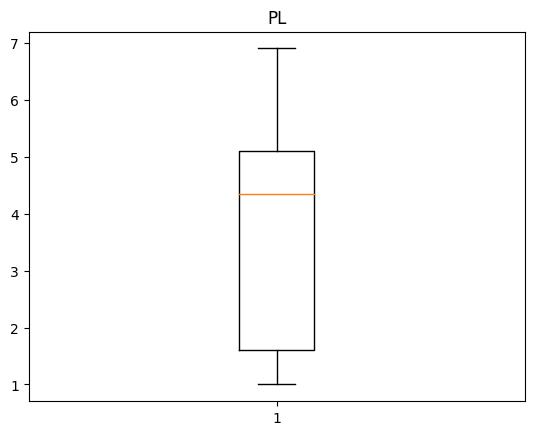

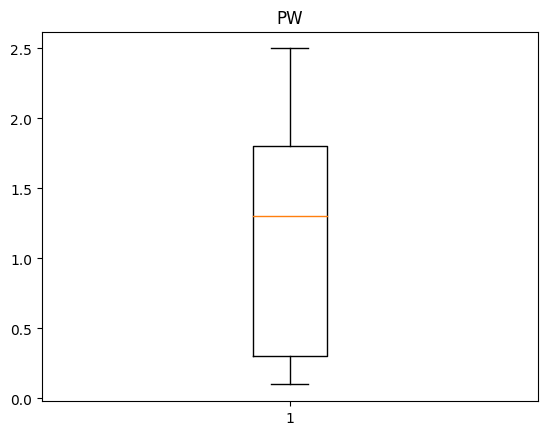

In [9]:
num_columns=['SL','SW','PL','PW']
for j in num_columns:
  plt.figure()
  plt.boxplot(iris_data[j])
  plt.title(j)
  plt.show()


In [10]:
##only SW has outliers
Q1=np.percentile(iris_data['SW'],25,method='midpoint')
Q2=np.percentile(iris_data['SW'],50,method='midpoint')
Q3=np.percentile(iris_data['SW'],75,method='midpoint')
print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)

Q1 is: 2.8
Q2 is: 3.0
Q3 is: 3.25


In [11]:
##interquratile range
IQR=Q3-Q1
print('IQR is:',IQR)
##lowerlimit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit :",low_lim)
print("upper limit:",up_lim)
outliers=[]
for x in iris_data['SW']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

IQR is: 0.4500000000000002
lower limit : 2.1249999999999996
upper limit: 3.9250000000000003
[4.0, 4.4, 4.1, 4.2, 2.0]


In [12]:
iris_data['SW']=iris_data['SW'].clip(lower=low_lim,upper=up_lim)##clipping

In [13]:
outliers=[]
for x in iris_data['SW']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

[]


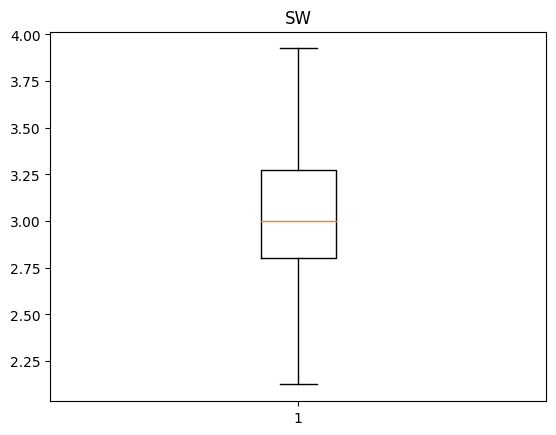

In [14]:
##boxplot
plt.boxplot(iris_data['SW'])
plt.title('SW')
plt.show()

In [15]:
##Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_data['Classification']=le.fit_transform(iris_data['Classification'])
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


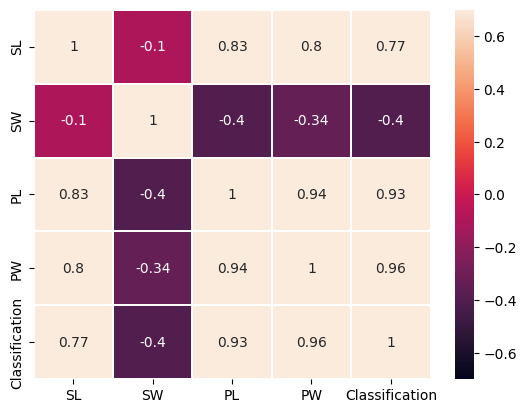

In [16]:
##correlation
sns.heatmap(iris_data.corr(),vmin = -0.7, vmax = 0.7, annot = True, linewidths = 0.2)
plt.show()

In [17]:
##splitting dependent and independent features
X=iris_data.drop('Classification',axis=1)
y=iris_data['Classification']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

**Logistic Regression**

In [19]:
##Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
Scaled_Xtrain=scaler.fit_transform(X_train)
Scaled_Xtest=scaler.fit_transform(X_test)

In [21]:
from  sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [22]:
log_reg.fit(Scaled_Xtrain,y_train)
log_pred=log_reg.predict(Scaled_Xtest)

In [23]:
log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,log_pred))
print(' R2 score is:',r2_score(y_test,log_pred))

MSE is: 0.03333333333333333
 R2 score is: 0.9523052464228935


Since Mean squared error and R2 score are near to 0 and 1 respectively.The model is good.

Let's find confusion matrix,Accuracy score,Precision Score,Recall Score,F1 score to arrive at a conclusion

In [25]:
##import Confusion matrix,Accuracy Score,Precision Score,Recall Score,F1 score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [26]:
confusion_matrix(y_test,log_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [27]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Presicion:',precision_score(y_test,log_pred,average='micro'))
print('Recall:',recall_score(y_test,log_pred,average='micro'))
print('F1:',f1_score(y_test,log_pred,average='micro'))

Accuracy: 0.9666666666666667
Presicion: 0.9666666666666667
Recall: 0.9666666666666667
F1: 0.9666666666666667


This model is good

***KNN***

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [29]:
print('MSE is:',mean_squared_error(y_test,knn_pred))
print(' R2 score is:',r2_score(y_test,knn_pred))

MSE is: 0.03333333333333333
 R2 score is: 0.9523052464228935


In [30]:
confusion_matrix(y_test,knn_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [31]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Presicion:',precision_score(y_test,knn_pred,average='micro'))
print('Recall:',recall_score(y_test,knn_pred,average='micro'))
print('F1:',f1_score(y_test,knn_pred,average='micro'))

Accuracy: 0.9666666666666667
Presicion: 0.9666666666666667
Recall: 0.9666666666666667
F1: 0.9666666666666667


Since Mean squared error and R2 score are near to 0 and 1 respectively.The model is good.

Let's find confusion matrix,Accuracy score,Precision Score,Recall Score,F1 score to arrive at a conclusion

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
knn_pred=classifier.predict(X_test_scaled)

In [35]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Presicion:',precision_score(y_test,knn_pred,average='micro'))
print('Recall:',recall_score(y_test,knn_pred,average='micro'))
print('F1:',f1_score(y_test,knn_pred,average='micro'))

Accuracy: 0.9666666666666667
Presicion: 0.9666666666666667
Recall: 0.9666666666666667
F1: 0.9666666666666667


This model is good

**SVM**

In [36]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [37]:
y_pred = sv_clf.predict(X_test_scaled)

In [38]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [39]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Presicion:',precision_score(y_test,y_pred,average='micro'))
print('Recall:',recall_score(y_test,y_pred,average='micro'))
print('F1:',f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9666666666666667
Presicion: 0.9666666666666667
Recall: 0.9666666666666667
F1: 0.9666666666666667


This model is good

***Decision Tree***

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled,y_train)
dt_pred=dt_clf.predict(X_test_scaled)

In [41]:
confusion_matrix(y_test,dt_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [42]:
print('Accuracy:',accuracy_score(y_test,dt_pred))
print('Presicion:',precision_score(y_test,dt_pred,average='micro'))
print('Recall:',recall_score(y_test,dt_pred,average='micro'))
print('F1:',f1_score(y_test,dt_pred,average='micro'))

Accuracy: 1.0
Presicion: 1.0
Recall: 1.0
F1: 1.0


**Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf .fit(X_train_scaled,y_train)


RandomForestClassifier()

In [44]:
rf_pred=rf_clf.predict(X_test_scaled)

In [45]:
confusion_matrix(y_test,rf_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [46]:
print('Accuracy:',accuracy_score(y_test,rf_pred))
print('Presicion:',precision_score(y_test,rf_pred,average='micro'))
print('Recall:',recall_score(y_test,rf_pred,average='micro'))
print('F1:',f1_score(y_test,rf_pred,average='micro'))

Accuracy: 1.0
Presicion: 1.0
Recall: 1.0
F1: 1.0


The classifiers, including Logistic Regression, KNN, and SVM, achieved high accuracy, indicating good predictive performance on the Iris dataset. Decision Tree and Random Forest models have achieved perfect accuracy (100%) it might have overfitting.
I prefer Logistic Regression,KNN and SVM.